In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# CNN

## CIFAR10

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # in , out, kernal (window), stride (movement)
        self.conv1 = nn.Conv2d(3, 64, 5, 1)
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        self.conv3 = nn.Conv2d(128, 128, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        # max pooling gives 1/4th the parameters
        self.fc1 = nn.Linear(3200, 1028)
        self.fc2 = nn.Linear(1028, 100)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)  # a 2 by 2 window becomes a single value
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        # x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        # x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    epochs = 10
    step_size = 3 # LR reduce
    torch.manual_seed(42)
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'batch_size': 32}
    if use_cuda:
        kwargs.update({'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True})

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    dataset1 = datasets.CIFAR10('./data', train=True, download=True,
                                transform=transform)
    dataset2 = datasets.CIFAR10('./data', train=False,
                                transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **kwargs)

    model = Net().to(device)
    optimizer = optim.Adam(model.parameters())

    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size)
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    # torch.save(model.state_dict(), "mnist_cnn.pt")
    print('Saved*')


if __name__ == '__main__':
    main()


Extracting ./data/cifar-10-python.tar.gz to ./data
Train Epoch: 1 [0/50000 (0%)]	Loss: 4.601831
Train Epoch: 1 [16000/50000 (32%)]	Loss: 1.228391
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.243555
Train Epoch: 1 [48000/50000 (96%)]	Loss: 1.200248

Test set: Average loss: 1.1098, Accuracy: 6070/10000 (61%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.041132
Train Epoch: 2 [16000/50000 (32%)]	Loss: 1.187556
Train Epoch: 2 [32000/50000 (64%)]	Loss: 0.613937
Train Epoch: 2 [48000/50000 (96%)]	Loss: 0.749840

Test set: Average loss: 0.9150, Accuracy: 6856/10000 (69%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.449399
Train Epoch: 3 [16000/50000 (32%)]	Loss: 0.380663
Train Epoch: 3 [32000/50000 (64%)]	Loss: 0.725610
Train Epoch: 3 [48000/50000 (96%)]	Loss: 0.324543

Test set: Average loss: 0.8363, Accuracy: 7246/10000 (72%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.409861
Train Epoch: 4 [16000/50000 (32%)]	Loss: 0.321897
Train Epoch: 4 [32000/50000 (64%)]	Loss: 0.237785
Train Epoch: 4 [48000/50000 (96%)]	L

### Secound Cifar 10 model

Files already downloaded and verified
Files already downloaded and verified


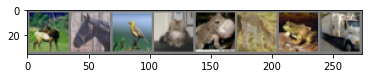

Epoch [1/10], Step [3125/6250], Loss: 1.5743, Loss: 0.001
Model saved
Epoch [1/10], Step [6250/6250], Loss: 0.9756, Loss: 0.001
Model saved
Epoch [2/10], Step [3125/6250], Loss: 1.2423, Loss: 0.001
Epoch [2/10], Step [6250/6250], Loss: 0.8610, Loss: 0.001
Model saved
Epoch [3/10], Step [3125/6250], Loss: 0.6053, Loss: 0.001
Model saved
Epoch [3/10], Step [6250/6250], Loss: 1.4957, Loss: 0.001
Epoch [4/10], Step [3125/6250], Loss: 0.7863, Loss: 0.001
Epoch [4/10], Step [6250/6250], Loss: 0.9809, Loss: 0.001
Epoch [5/10], Step [3125/6250], Loss: 1.0818, Loss: 0.001
Epoch [5/10], Step [6250/6250], Loss: 0.7098, Loss: 0.001
Epoch [6/10], Step [3125/6250], Loss: 1.4608, Loss: 0.001
Epoch [6/10], Step [6250/6250], Loss: 0.4044, Loss: 0.001
Model saved
Epoch [7/10], Step [3125/6250], Loss: 0.6990, Loss: 0.001
Epoch [7/10], Step [6250/6250], Loss: 0.9097, Loss: 0.001
Epoch [8/10], Step [3125/6250], Loss: 1.5360, Loss: 0.001
Epoch [8/10], Step [6250/6250], Loss: 1.0049, Loss: 0.001
Epoch [9/10]

In [11]:
# adapted from https://github.com/python-engineer/pytorchTutorial/blob/master/14_cnn.py

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 10
batch_size = 8
learning_rate = 0.001 # 0.001
step_size = 4

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400       # (1, output * kernal * kernal)
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, factor=0.5)
# scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=step_size, gamma=0.5)

n_total_steps = len(train_loader)
MIN_LOSS = 9999999
SAVE_PATH = './cnn.pth'
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        global loss
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 3125 == 0:
            lr = optimizer.param_groups[0]['lr']
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Loss: {lr}')
            if loss.item() < MIN_LOSS:
              MIN_LOSS = loss.item()
              torch.save({
                          'epoch': epoch,
                          'learning_rate': lr,
                          'loss': loss.item(), # not the OBJ
                          'model_state_dict': model.state_dict(),
                          'optimizer_state_dict': optimizer.state_dict(),
                          }, SAVE_PATH)
              print("Model saved")
    pass # end of epoch 
    # scheduler.step()

print('Finished Training')



with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


In [12]:
print('Finished Training. Restoring best model')
checkpoint = torch.load(SAVE_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
model.eval()

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Finished Training. Restoring best model
Accuracy of the network: 62.09 %
Accuracy of plane: 68.7 %
Accuracy of car: 76.0 %
Accuracy of bird: 51.0 %
Accuracy of cat: 43.0 %
Accuracy of deer: 51.9 %
Accuracy of dog: 46.0 %
Accuracy of frog: 77.0 %
Accuracy of horse: 66.1 %
Accuracy of ship: 79.3 %
Accuracy of truck: 61.9 %


## ResNet

Used: [Video](https://www.youtube.com/watch?v=DkNIBBBvcPs) | [Code](https://raw.githubusercontent.com/AladdinPerzon/Machine-Learning-Collection/master/ML/Pytorch/CNN_architectures/pytorch_resnet.py)

In [6]:
class block(nn.Module):
    def __init__(self, in_channels, intermediate_channels, identity_downsample=None, stride=1):
        super().__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(
            in_channels, intermediate_channels, kernel_size=1, stride=1, padding=0
        )
        self.bn1 = nn.BatchNorm2d(intermediate_channels)
        self.conv2 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
        )
        self.bn2 = nn.BatchNorm2d(intermediate_channels)
        self.conv3 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels * self.expansion,
            kernel_size=1,
            stride=1,
            padding=0,
        )
        self.bn3 = nn.BatchNorm2d(intermediate_channels * self.expansion)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample
        self.stride = stride

    def forward(self, x):
        identity = x.clone()

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.relu(x)
        return x

In [7]:
class ResNet(nn.Module):
    def __init__(self, block, layers, image_channels, num_classes):
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, out_channels=64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Essentially the entire ResNet architecture are in these 4 lines below
        self.layer1 = self._make_layer(
            block, layers[0], intermediate_channels=64, stride=1
        )
        self.layer2 = self._make_layer(
            block, layers[1], intermediate_channels=128, stride=2
        )
        self.layer3 = self._make_layer(
            block, layers[2], intermediate_channels=256, stride=2
        )
        self.layer4 = self._make_layer(
            block, layers[3], intermediate_channels=512, stride=2
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * 4, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)  # TODO why?
        x = self.fc(x)

        return x

    def _make_layer(self, block, num_residual_blocks, intermediate_channels, stride):
        identity_downsample = None
        layers = []

        # Either if we half the input space for ex, 56x56 -> 28x28 (stride=2), or channels changes
        # we need to adapt the Identity (skip connection) so it will be able to be added
        # to the layer that's ahead
        if stride != 1 or self.in_channels != intermediate_channels * 4:
            identity_downsample = nn.Sequential(
                nn.Conv2d(
                    self.in_channels,
                    intermediate_channels * 4,
                    kernel_size=1,
                    stride=stride,
                ),
                nn.BatchNorm2d(intermediate_channels * 4),
            )

        layers.append(
            block(self.in_channels, intermediate_channels, identity_downsample, stride)
        )

        # The expansion size is always 4 for ResNet 50,101,152
        self.in_channels = intermediate_channels * 4

        # For example for first resnet layer: 256 will be mapped to 64 as intermediate layer,
        # then finally back to 256. Hence no identity downsample is needed, since stride = 1,
        # and also same amount of channels.
        for i in range(num_residual_blocks - 1):
            layers.append(block(self.in_channels, intermediate_channels))

        return nn.Sequential(*layers)

In [8]:
def ResNet50(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 4, 6, 3], img_channel, num_classes)

def ResNet101(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 4, 23, 3], img_channel, num_classes)

def ResNet152(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 8, 36, 3], img_channel, num_classes)

net = ResNet50(img_channel=3, num_classes=10)
y = net(torch.randn(10, 3, 224, 224)).to("cuda")
print(y.size())

torch.Size([10, 10])


In [17]:
 def main():
    epochs = 8
    step_size = 3 # LR reduce
    LR = 0.005
    torch.manual_seed(42)
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'batch_size': 8}
    if use_cuda:
        kwargs.update({'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True})

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    dataset1 = datasets.CIFAR10('./data', train=True, download=True,
                                transform=transform)
    dataset2 = datasets.CIFAR10('./data', train=False,
                                transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **kwargs)

    model = ResNet50(img_channel=3, num_classes=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)
    
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    print('Saved*')


def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)

        # loss = criterion(outputs, labels) # CrossEntropyLoss  combines nn.LogSoftmax() and nn.NLLLoss() in one single class
        loss = F.nll_loss(F.log_softmax(output, 1), target)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tLR: {}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), 
                optimizer.param_groups[0]['lr']))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.nll_loss(F.log_softmax(output, 1), target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


if __name__ == '__main__':
    main()

Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.768683	LR: 0.01
Train Epoch: 1 [4000/50000 (8%)]	Loss: 2.310725	LR: 0.01
Train Epoch: 1 [8000/50000 (16%)]	Loss: 2.410838	LR: 0.01
Train Epoch: 1 [12000/50000 (24%)]	Loss: 2.218067	LR: 0.01
Train Epoch: 1 [16000/50000 (32%)]	Loss: 2.441532	LR: 0.01
Train Epoch: 1 [20000/50000 (40%)]	Loss: 2.163667	LR: 0.01
Train Epoch: 1 [24000/50000 (48%)]	Loss: 2.212940	LR: 0.01
Train Epoch: 1 [28000/50000 (56%)]	Loss: 1.899210	LR: 0.01
Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.166584	LR: 0.01
Train Epoch: 1 [36000/50000 (72%)]	Loss: 2.130281	LR: 0.01
Train Epoch: 1 [40000/50000 (80%)]	Loss: 2.174778	LR: 0.01
Train Epoch: 1 [44000/50000 (88%)]	Loss: 2.293875	LR: 0.01
Train Epoch: 1 [48000/50000 (96%)]	Loss: 1.944820	LR: 0.01

Test set: Average loss: 1.9549, Accuracy: 2546/10000 (25%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 2.586738	LR: 0.01
Train Epoch: 2 [4000/50000 (8%)]	Loss: 1.909199	LR: 0.01
Train Epoch: 2 [8000/50000 (16%

### Transfer Learning

[transfer learning code adapted from HERE](https://github.com/python-engineer/pytorchTutorial/blob/master/15_transfer_learning.py)

In [16]:
 def main():
    epochs = 20
    step_size = 3 # LR reduce
    LR = 0.1 # 0.001
    torch.manual_seed(42)
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    print(device)
    kwargs = {'batch_size': 8}
    if use_cuda:
        kwargs.update({'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True})

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    dataset1 = datasets.CIFAR10('./data', train=True, download=True,
                                transform=transform)
    dataset2 = datasets.CIFAR10('./data', train=False,
                                transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **kwargs)
   
   ###############################
    model = torchvision.models.resnet18(pretrained=True)

    #### ConvNet as fixed feature extractor ####
    # Here, we need to freeze all the network except the final layer.
    # We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
    # for param in model.parameters():
    #     param.requires_grad = False

    # instead of 2048 -> 2, its 2048 ->   since we have ten classes
    model.fc = nn.Linear(model.fc.in_features, 10)
    # model = ResNet50(img_channel=3, num_classes=10).to(device)

    model = model.to(device)
    ###############################


    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)
    
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)

        # loss = criterion(outputs, labels) # CrossEntropyLoss  combines nn.LogSoftmax() and nn.NLLLoss() in one single class
        loss = F.nll_loss(F.log_softmax(output, 1), target)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tLR: {}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), 
                optimizer.param_groups[0]['lr']))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.nll_loss(F.log_softmax(output, 1), target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


if __name__ == '__main__':
    main()

True
Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.603493	LR: 0.1
Train Epoch: 1 [4000/50000 (8%)]	Loss: 2.257922	LR: 0.1
Train Epoch: 1 [8000/50000 (16%)]	Loss: 1.923491	LR: 0.1
Train Epoch: 1 [12000/50000 (24%)]	Loss: 1.795898	LR: 0.1
Train Epoch: 1 [16000/50000 (32%)]	Loss: 1.944562	LR: 0.1
Train Epoch: 1 [20000/50000 (40%)]	Loss: 2.219519	LR: 0.1
Train Epoch: 1 [24000/50000 (48%)]	Loss: 1.729088	LR: 0.1
Train Epoch: 1 [28000/50000 (56%)]	Loss: 2.610487	LR: 0.1
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.921951	LR: 0.1
Train Epoch: 1 [36000/50000 (72%)]	Loss: 2.006932	LR: 0.1
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.936138	LR: 0.1
Train Epoch: 1 [44000/50000 (88%)]	Loss: 2.252315	LR: 0.1
Train Epoch: 1 [48000/50000 (96%)]	Loss: 1.885086	LR: 0.1

Test set: Average loss: 2.0193, Accuracy: 1835/10000 (18%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 2.074857	LR: 0.1
Train Epoch: 2 [4000/50000 (8%)]	Loss: 2.219013	LR: 0.1
Train Epoch: 2 [8000/50000 (16%)]	Loss: 1

KeyboardInterrupt: ignored

# VAE

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.kernel_approximation import RBFSampler
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn import metrics
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import Normalizer

# traindata = pd.read_csv('https://raw.githubusercontent.com/vinayakumarr/mlc18/master/IDS/data/KDDTrain.csv', header=None)
# testdata = pd.read_csv('https://raw.githubusercontent.com/vinayakumarr/mlc18/master/IDS/data/KDDTest.csv', header=None)
# testdata.head(3)